<a href="https://colab.research.google.com/github/Arqamansari23/NLP/blob/main/Multi_Label_Text_Classification_Model_with_DistilBERT_and_Hugging_Face_Transformers_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fine-Tuning DistilBERT for Multi-Label Classification**

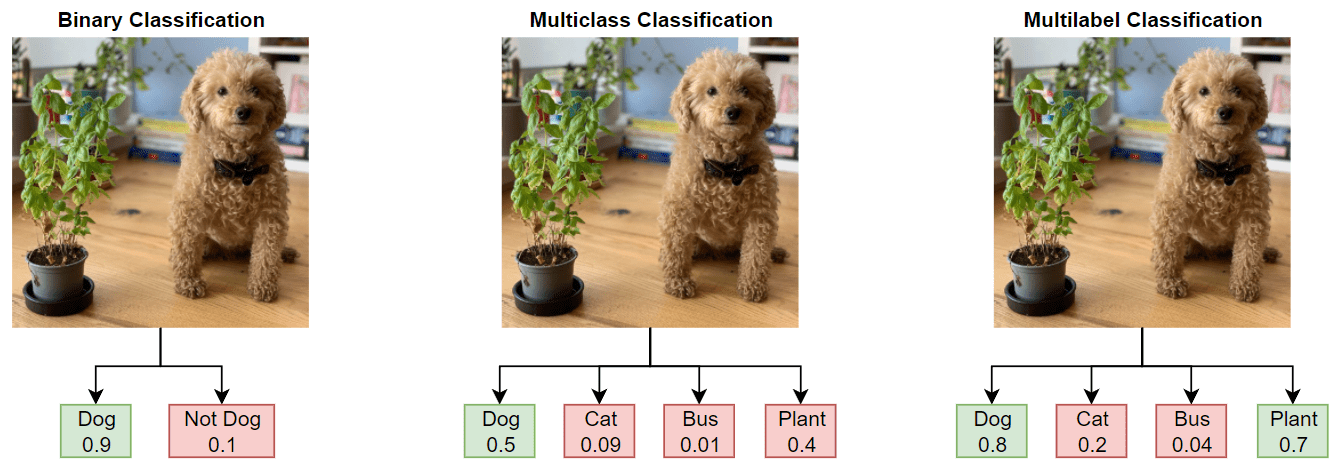



*   In Binary Classification the Output is Either Dog or Not
*   In Multiclass Classification The Image has DOg And Plat But Model More Focus on dog

*  In Multilabel Classification it Predict Both Dog and Plant  






# **Loading The Data**

In [1]:
!pip install -U accelerate
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0


In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Movie-Data.csv", usecols=["Description", "Genre"])
df.head()

,Genre,Description
0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


### Checking If data is Imbalanced

In [4]:
df['Genre'].value_counts()

,count
Genre,
"Action,Adventure,Sci-Fi",50
Drama,48
"Comedy,Drama,Romance",35
Comedy,32
"Drama,Romance",31
...,...
"Action,Comedy,Family",1
"Action,Crime,Fantasy",1
"Comedy,Mystery",1


In [11]:
df['Genre'].str.split(',')

,Genre
0,"[Action, Adventure, Sci-Fi]"
1,"[Adventure, Mystery, Sci-Fi]"
2,"[Horror, Thriller]"
3,"[Animation, Comedy, Family]"
4,"[Action, Adventure, Fantasy]"
...,...
995,"[Crime, Drama, Mystery]"
996,[Horror]
997,"[Drama, Music, Romance]"
998,"[Adventure, Comedy]"


In [12]:
df['Genre'] = df['Genre'].str.split(',')

In [13]:
for i in df['Genre'] :
  print(i)

['Action', 'Adventure', 'Sci-Fi']
['Adventure', 'Mystery', 'Sci-Fi']
['Horror', 'Thriller']
['Animation', 'Comedy', 'Family']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Fantasy']
['Comedy', 'Drama', 'Music']
['Comedy']
['Action', 'Adventure', 'Biography']
['Adventure', 'Drama', 'Romance']
['Adventure', 'Family', 'Fantasy']
['Biography', 'Drama', 'History']
['Action', 'Adventure', 'Sci-Fi']
['Animation', 'Adventure', 'Comedy']
['Action', 'Comedy', 'Drama']
['Animation', 'Adventure', 'Comedy']
['Biography', 'Drama', 'History']
['Action', 'Thriller']
['Biography', 'Drama']
['Drama', 'Mystery', 'Sci-Fi']
['Adventure', 'Drama', 'Thriller']
['Drama']
['Crime', 'Drama', 'Horror']
['Animation', 'Adventure', 'Comedy']
['Action', 'Adventure', 'Sci-Fi']
['Comedy']
['Action', 'Adventure', 'Drama']
['Horror', 'Thriller']
['Comedy']
['Action', 'Adventure', 'Drama']
['Comedy']
['Drama', 'Thriller']
['Action', 'Adventure', 'Sci-Fi']
['Action', 'Adventure', 'Comedy']
['Action', 'Horror

In [14]:
genre_counts =[j for i in df['Genre'] for j in i ]

In [15]:
genre_counts

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [16]:
pd.Series(genre_counts).value_counts()

,count
Drama,513
Action,303
Comedy,279
Adventure,259
Thriller,195
Crime,150
Romance,141
Sci-Fi,120
Horror,119
Mystery,106


for below 100 count the data is imbalanced it will not produce much accurate Pridiction about it because data is Less

# **Label Encoding**

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

In [18]:
multilabel = MultiLabelBinarizer()

labels = multilabel.fit_transform(df['Genre']).astype('float32')   # the Genre column should be in list format before passing throught this

texts = df['Description'].tolist()

In [19]:
labels    # Our labels "Genre" is Now OHE

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
texts     # a list countaining all the text

['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.',
 "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",
 'A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.',
 'European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.',
 'A jazz pia

# Train Test Split Of text

In [21]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels,
                                                                    test_size=0.2, random_state=42)

# **Model Building**

### Initializing Tokanizer And Model

In [23]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification

from torch.utils.data import Dataset




checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(labels[0]),
                                                            problem_type="multi_label_classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Making Function To convert data Text Into Tokens And Labels into Tensors array

In [27]:
# Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=128):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': label
    }

### Making Train And validation Tokanized Dataset

In [28]:
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

### Making Function TO calculate Multi label Performance Matrices

In [29]:
# Multi-Label Classification Evaluation Metrics
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, hamming_loss
from transformers import EvalPrediction
import torch


def multi_labels_metrics(predictions, labels, threshold=0.3): # the traeshold is hyperparemeter . Any value greater than Threshold value is Considered As 1
  sigmoid = torch.nn.Sigmoid()
  probs = sigmoid(torch.Tensor(predictions))

  y_pred = np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)] = 1
  y_true = labels

  f1 = f1_score(y_true, y_pred, average = 'macro')
  roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
  hamming = hamming_loss(y_true, y_pred)

  metrics = {
      "roc_auc": roc_auc,
      "hamming_loss": hamming,
      "f1": f1
  }

  return metrics

def compute_metrics(p:EvalPrediction):
  preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

  result = multi_labels_metrics(predictions=preds,
                                labels=p.label_ids)

  return result

### Defining Training Arguments And Model Trainer

In [30]:
# Training Arguments
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir = './results',
    num_train_epochs=1,
    save_steps=1000,
    save_total_limit=2
)

trainer = Trainer(model=model,
                  args=args,
                  train_dataset=train_dataset,
                  eval_dataset = val_dataset,
                  compute_metrics=compute_metrics)

### Train The Mdoel

In [31]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=100, training_loss=0.3922710418701172, metrics={'train_runtime': 687.8067, 'train_samples_per_second': 1.163, 'train_steps_per_second': 0.145, 'total_flos': 26501984256000.0, 'train_loss': 0.3922710418701172, 'epoch': 1.0})

### Model Evaluation

In [32]:
trainer.evaluate()

{'eval_loss': 0.32775184512138367,
 'eval_roc_auc': 0.5292134647520208,
 'eval_hamming_loss': 0.131,
 'eval_f1': 0.11974380997846672,
 'eval_runtime': 45.135,
 'eval_samples_per_second': 4.431,
 'eval_steps_per_second': 0.554,
 'epoch': 1.0}

### saving The model

In [33]:
trainer.save_model("distilbert-finetuned-imdb-multi-label")

# Predictions

In [34]:
text = "Carol Danvers gets her powers entangled with those of Kamala Khan and Monica Rambeau, forcing them to work together to save the universe."

encoding = tokenizer(text, return_tensors='pt')
encoding.to(trainer.model.device)

outputs = trainer.model(**encoding)

In [35]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())
preds = np.zeros(probs.shape)
preds[np.where(probs>=0.3)] = 1

multilabel.classes_

multilabel.inverse_transform(preds.reshape(1,-1))

[('Action', 'Adventure', 'Drama')]